Retrieve data from World Health Organization

In [72]:
import requests

url = "https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001.json"

params = {
    "filter": "COUNTRY:*",
}

response = requests.get(url, params=params)

data = response.json()


Extract country names and HIV prevalence

In [73]:
countries = []
years = []
rates = []
for item in data['fact']:
    rates.append(item['value']['numeric'])
    for dim in item['Dim']:
        if dim['category'] == 'COUNTRY':
                countries.append(dim['code'])
        if dim['category'] == 'YEAR':
                years.append(dim['code'])

Create DataFrame with Arrays

In [74]:
import pandas as pd

data = {'Country':countries, 'Year':years, 'Rate': rates}
df = pd.DataFrame(data)
print(df)

     Country  Year      Rate
0        AFG  2010  59.60036
1        AFG  2010  60.29720
2        AFG  2010  59.94055
3        AGO  2010  55.77834
4        AGO  2010  60.52821
...      ...   ...       ...
2191     ZMB  2010  59.06268
2192     ZMB  2015  60.49665
2193     ZWE  2015  55.73344
2194     ZWE  2015  60.95527
2195     ZWE  2015  58.47603

[2196 rows x 3 columns]


In [75]:
grouped_df = df.groupby(['Year']).sum()
print(grouped_df)

             Rate
Year             
2000  36661.66863
2010  38445.26208
2015  39263.71584
2019  39834.00431


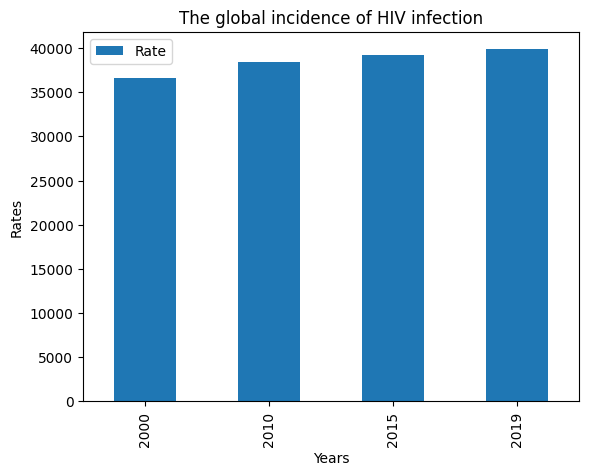

In [76]:
import matplotlib.pyplot as plt

new_df = grouped_df.reset_index()

new_df.plot(kind='bar',x='Year',y='Rate')

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('The global incidence of HIV infection')

plt.show()

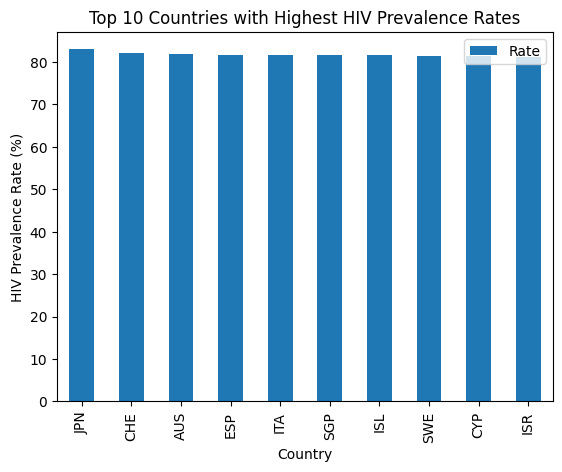

In [77]:
grouped_df = df.groupby('Country').mean().sort_values(by='Rate', ascending=False)
top_10 = grouped_df.nlargest(10,'Rate')
top_10['Country'] = top_10.index

top_10.plot(kind='bar', x='Country', y='Rate')
plt.xlabel('Country')
plt.ylabel('HIV Prevalence Rate (%)')
plt.title('Top 10 Countries with Highest HIV Prevalence Rates')

plt.show()